## **Code Description**
1. Import dataset into notebook
2. Performing EDA on Dataset
3. Checking for Missing/NULL values
4. Filling NULL Values
5. Splitting dataset into Train,Test,Validation data
6. Training Models on train data
7. Comparing Mean Square Error on Validation Data of Models
8. Testing the best trained model for predicting prices

**Importing Libraries**

In [11]:
import pandas as pd
import numpy as np

**Importing Data**

In [12]:
data = pd.read_csv("housing.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


**Shuffling Data Frame**

In [13]:
shuffled_df = data.sample(n=len(data), random_state=100 )
df = shuffled_df
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
8151,-118.10,33.81,36.0,1111.0,184.0,444.0,177.0,3.7031,245300.0,<1H OCEAN
53,-122.27,37.82,52.0,1630.0,456.0,1162.0,400.0,1.2475,104200.0,NEAR BAY
3039,-119.12,35.37,13.0,4527.0,713.0,2170.0,671.0,4.8266,146200.0,INLAND
9484,-123.15,39.31,19.0,1026.0,205.0,424.0,152.0,2.8833,154200.0,INLAND
9307,-122.52,37.98,31.0,6555.0,1571.0,2962.0,1464.0,2.8903,324200.0,NEAR BAY


**Dropping Categorical Variable**

In [14]:
df.drop('ocean_proximity', axis=1, inplace= True)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
8151,-118.10,33.81,36.0,1111.0,184.0,444.0,177.0,3.7031,245300.0
53,-122.27,37.82,52.0,1630.0,456.0,1162.0,400.0,1.2475,104200.0
3039,-119.12,35.37,13.0,4527.0,713.0,2170.0,671.0,4.8266,146200.0
9484,-123.15,39.31,19.0,1026.0,205.0,424.0,152.0,2.8833,154200.0
9307,-122.52,37.98,31.0,6555.0,1571.0,2962.0,1464.0,2.8903,324200.0


**Data Description**

In [15]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


**Checking for Nulls**

In [16]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

**Filling Null Values**

In [17]:
median_bedrooms = df.total_bedrooms.median()
df.total_bedrooms.fillna(median_bedrooms, inplace=True)
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

**Splitting Data for Training, Testing and Validation**

In [19]:
train_df, test_df, val_df = df[:18000], df[18000:19217], df[19215:]

X_train, y_train = train_df.to_numpy()[:, :-1], train_df.to_numpy()[:, -1]

X_val, y_val = val_df.to_numpy()[:, :-1], val_df.to_numpy()[:, -1]

X_test, y_test = test_df.to_numpy()[:, :-1], test_df.to_numpy()[:, -1]


<AxesSubplot:>

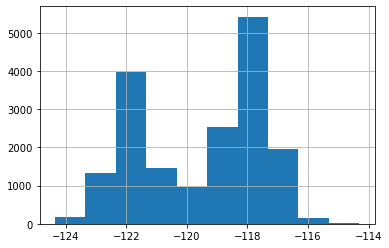

In [20]:
pd.DataFrame(X_train)[0].hist()

**Normalizing Data Frame**

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

def preprocessor(X):
  A = np.copy(X)
  A[:, :8] = scaler.transform(A[:, :8])

  return A

X_train_preprocessed, X_val_preprocessed, X_test_preprocessed = preprocessor(X_train), preprocessor(X_val), preprocessor(X_test)

In [23]:
pd.DataFrame(X_train_preprocessed)

,0,1,2,3,4,5,6,7
0,0.733072,-0.852406,0.584595,-0.704095,-0.847191,-0.898249,-0.851299,-0.088663
1,-1.351790,1.028605,1.856492,-0.463318,-0.191951,-0.238757,-0.261180,-1.381126
2,0.223106,-0.120641,-1.243756,0.880670,0.427154,0.687103,0.455960,0.502671
3,-1.791761,1.727535,-0.766795,-0.743529,-0.796603,-0.916619,-0.917456,-0.520151
4,-1.476782,1.103658,0.187128,1.821509,2.494049,1.414564,2.554456,-0.516467
...,...,...,...,...,...,...,...,...
17995,-0.211865,1.553975,-0.528314,0.227465,0.251299,-0.584118,-0.390847,-0.416306
17996,0.948058,-0.993130,-0.846288,-0.456360,-0.343716,0.062515,-0.380262,-0.206509
17997,-1.411786,0.981697,1.856492,-1.156885,-1.208536,-1.220647,-1.250886,-0.906953
17998,0.808067,-0.847716,0.505102,-0.724044,-0.832737,-0.833953,-0.859238,0.106290


<AxesSubplot:>

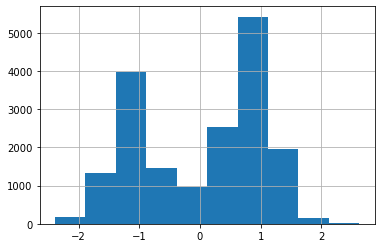

In [24]:
pd.DataFrame(X_train_preprocessed)[0].hist()

**Training Linear Regression Model**

In [37]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression
lm = LinearRegression().fit(X_train, y_train)
mse(lm.predict(X_train), y_train, squared=False),mse(lm.predict(X_val), y_val, squared=False)


(69021.69273855614, 78889.56518461765)

In [48]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=50).fit(X_train, y_train)
mse(knn.predict(X_train), y_train, squared=False), mse(knn.predict(X_val), y_val, squared=False)

(93773.07211829891, 98151.23415789285)

In [49]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(max_depth=10).fit(X_train, y_train)
mse(rfr.predict(X_train), y_train, squared=False), mse(rfr.predict(X_val), y_val, squared=False)

(42552.633416806566, 56143.6132360131)

**Prediction**

In [51]:
predict = rfr.predict(X_test)
pd.DataFrame(predict)

,0
0,245289.481772
1,101401.778150
2,191314.198688
3,154369.345778
4,203276.998208
...,...
1212,333161.962779
1213,330937.372512
1214,202815.167943
1215,211504.952063
